In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from tqdm import tqdm

# Definicion matematica
## 0.1 Obtencion de la ec. numerica
$\Large\frac{du}{dt}=\alpha(\frac{d^2u}{d^2x}+\frac{d^2u}{d^2y}+\frac{d^2u}{d^2z})$     

Usando diferencias finitas las derivadas primera temporal y segundas temporal son:      
$\frac{du}{dt}=\frac{u^{n+1}_i-u^{n}_{i}}{\bigtriangleup t} \quad\quad ,\frac{d^2u}{d^2x}=\frac{u^{n}_{i+1}-2u^{n}_i-u^{n}_{i-1}}{\bigtriangleup x^2}$      

Por tanto la ec. final para el **calculo numerico** en una dimension sería:     
$\boxed{u^{n+1}_i=u^{n}_i+\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}(u^{n}_{i+1}-2u^{n}_i-u^{n}_{i-1})}$

## 0.2 Problema de estabilidad
Si no queremos generar resultados donde haya divergencias, habrá que cumplir una condición de estabilidad. Esta surge del Analisis de Von Neuman de Errores. En el los errores se pueden representar de la siguiente forma:     
$e^n_i=G^ne^{ikx_i}$        

Siendo xi la posicion de la malla, k el numero de onda y G el factor de amplificacion. Para que haya estabilidad este debería ser menor que 1, |G|=<1. Añadir que $G=G^{n+1}/G^n$. Con esto dicho, podemos sustituir en nuestro problema $u^n_i=G^ne^{ikx_i}$.     
$G^{n+1}e^{ikx_i}=G^ne^{ikx_i}+\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}(G^ne^{ikx_{i-1}}-2G^ne^{ikx_i}+G^ne^{ikx_{i+1}})\quad$ Pasamos dividiendo la e y las G              
$G=1+\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}(e^{-ik\bigtriangleup x}-2+e^{ik\bigtriangleup x})\quad Cos(y)=e(iy)+e(-iy)/2$            
$G=1+\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}(2\cos(k\bigtriangleup x)-2)\quad$ $2\sin^2(y/2)=1-cos(y)$     
$G=1-4\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}\sin(k\bigtriangleup x/2)\quad$      

El seno esta acotado entre 0 y 1, por tanto el peor resultado posible es: $G=1-4\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}$. Imponemos ahora que |G|=<1 obteniendo así el **criterio de estabilidad** para los calculos numericos:       
$-1\leq 1-4\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}\leq 1$        
$-2\leq-4\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}\leq 0$        
$2\geq 4\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}\geq 0$        
$\alpha\frac{\bigtriangleup t}{\bigtriangleup x^2}\leq 0.5$        
$\boxed{\bigtriangleup t\leq 0.5\frac{\bigtriangleup x^2}{\alpha}}$        


# 1. Heat equation 1D
---

Tiempo ejecucion  0.0334
Temperatura media  73.3916  despues de 2 s


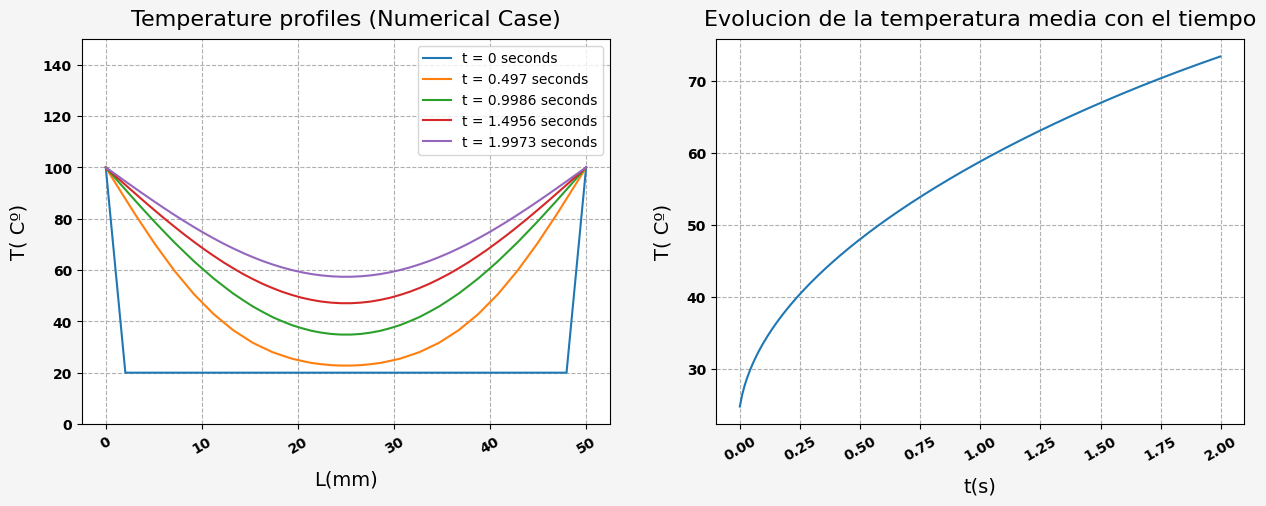

In [9]:
###############  Parametros inciales ############## 
a = 110 #difusividad termica mm2/s
length = 50 #mm
t = 2 #seconds
nodes = 50
temp_ini=20# Temperatura inicial

############## Inicializar ############## 
#Diferenciales
dx = length / (nodes-1)
dt = 0.5 * dx**2 / a#condicion de estabilidad

u = np.zeros(nodes) + temp_ini # Temperatura inicial
x=np.arange(0,length+1,dx)
############### Condiciones de contorno ############## 
#Extremos temperatura de 100
u[0] = 100
u[-1] = 100

################  Simulacion############### 
counter = 0
time_mesh=[]
temperature_mesh=[]
start=time.time()
while counter < t :
    w = u.copy()
    for i in range(1, nodes - 1):
        u[i] = dt * a * (w[i - 1] - 2 * w[i] + w[i + 1]) / dx ** 2 + w[i]
    time_mesh.append(counter)
    temperature_mesh.append(u.copy())

    counter += dt
print('Tiempo ejecucion ',round(time.time()-start,4))
temperature_mesh=np.array(temperature_mesh)
temperature_mean=np.mean(temperature_mesh,axis=-1)
print('Temperatura media ',round((temperature_mean[-1]),4),' despues de',t,'s')
############################## PLOTS ##################################
plt.figure(facecolor='whitesmoke',figsize=(15,5))
plt.subplot(1,2,1)

time_points =np.linspace(0,len(time_mesh)-1,5,dtype=int)
for k in time_points:
    plt.plot(x, temperature_mesh[k], label=f"t = {round(time_mesh[k],4)} seconds")

plt.title("Perfiles de temperatura (Caso Numerico)", fontsize=16,pad=10)
plt.xlabel('L(mm)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
plt.ylim(0,150)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.legend()

plt.subplot(1,2,2)
plt.title('Evolucion de la temperatura media con el tiempo', fontsize=16,pad=10)
plt.plot(time_mesh,temperature_mean)
plt.xlabel('t(s)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.show()


# 2. Heat equation 2D
---

Tiempo ejecucion  2.9409


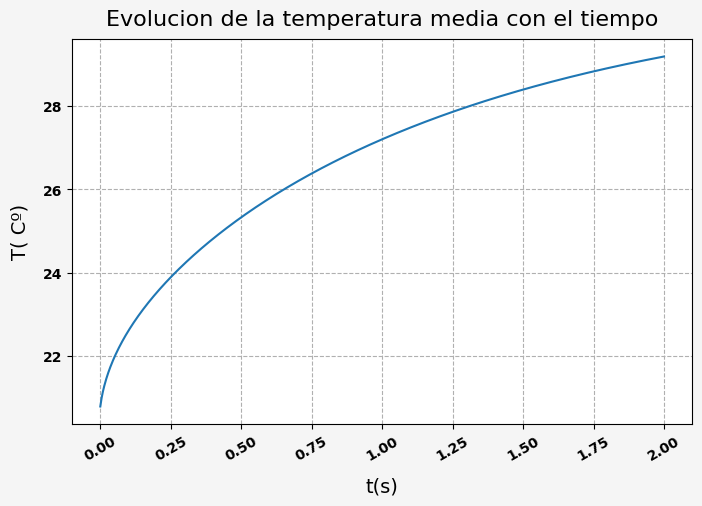

In [8]:
################ Parametros inciales ############### 
a = 110 #difusividad termica mm2/s
length = 50 #mm
t = 2 #seconds
nodes = 50
k=100
temp_ini=20
################  Inicializar ############### 
#diferenciales
dx = length / (nodes-1)
dy = length / (nodes-1)
dt = min(   dx**2 / (4 * a),     dy**2 / (4 * a))#condicion de estabilidad

u = np.zeros((nodes, nodes)) + temp_ini # Temperatura inicial
################ Condiciones de contorno ################ 
def boundary_conditions(u,temperature=100,kind=''):
    #extremos de la placa con temperatura
    if kind=='square':
        u[0, :] = temperature
        u[-1, :] = temperature

        u[:, 0] = temperature
        u[:, -1] = temperature
    # punto con temperatura
    elif kind=='points':
        x_ini=int(nodes/2)
        x_radius=5
        u[0,x_ini-x_radius:x_ini+x_radius ]=temperature
        u[-1,x_ini-x_radius:x_ini+x_radius ]=temperature
    return u
#################  Simulacion ################ 
u=boundary_conditions(u,temperature=100,kind='points')
counter = 0
start=time.time()
time_mesh=[]
list_temperatures_mean=[]
while counter < t :

    w = u.copy()

    for i in range(1, nodes - 1):
        for j in range(1, nodes - 1):

            dd_ux = (w[i-1, j] - 2*w[i, j] + w[i+1, j])/dx**2
            dd_uy = (w[i, j-1] - 2*w[i, j] + w[i, j+1])/dy**2

            u[i, j] = dt * k * (dd_ux + dd_uy) + w[i, j]

    time_mesh.append(counter)
    list_temperatures_mean.append(np.mean(u))

    counter += dt
print('Tiempo ejecucion ',round(time.time()-start,4))

plt.figure(facecolor='whitesmoke',figsize=(8,5))
plt.title('Evolucion de la temperatura media con el tiempo', fontsize=16,pad=10)
plt.plot(time_mesh,list_temperatures_mean)
plt.xlabel('t(s)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.show()

# 3. Optimización
---
## 3.1 2D

Para optimizar, lo mejor que se puede hacer es dejar de usar bucles y usar arrays, para ello, analizando en una dimension podemos sacar que elementos del array debemos sacar y luego extrapolar a la otra dimension:       
$du_x = w[i-1,j]+2w[i,j]+w[i+1,j]\quad i,j=1,2,3,...,N-1$      
$i=1,\quad du_x = w[0,j]+2w[1,j]+w[2,j]$     
$i=2,\quad du_x = w[1,j]+2w[2,j]+w[3,j]$     
$...$       
$i=N-1,\quad du_x = w[N-2,j]+2w[N-1,j]+w[N,j]\quad=\quad du_x = w[:-2,1:-1]+2w[1:-1,1:-1]+w[2:,1:-1]$       
Se ve que lo definido anteriormente para los bucles no son más que determinados elementos de los arrays de froma secuencial, podemos entonces sacar slices de los arrays fijandonos en el primer y ultimo elemento de cada w[,]. Por ejemplo, para el primer w este va desde 0 (primer elemento) hasta N-2 (antepenultimo elemento) en i y j como no se toca va desde lo definido, de 1 a N-1, por tanto w[:-2,1:-1].

Finalizado en: 0.033s


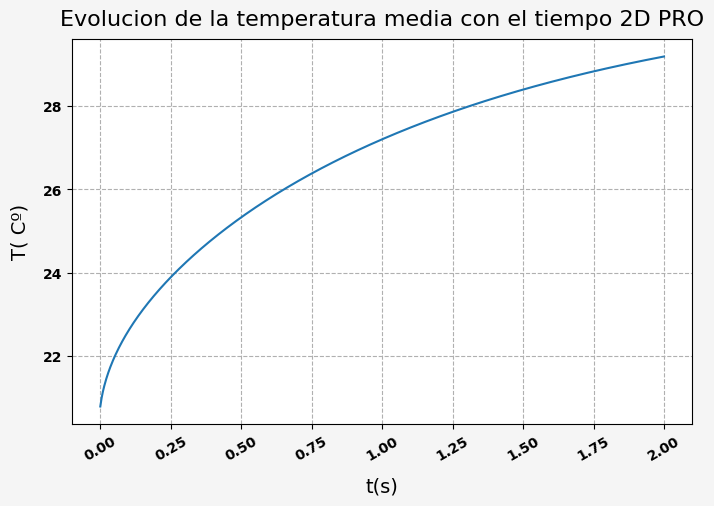

In [7]:
################# Parametros inciales ################ 
a = 110 #difusividad termica mm2/s
length = 50 #mm
t = 2 #seconds
nodes = 50
k=100
temp_ini=20
#################  Inicializar ################ 
#diferenciales
dx = length / (nodes-1)
dy = length / (nodes-1)
dt = min(   dx**2 / (4 * a),     dy**2 / (4 * a))#condicion de estabilidad

u = np.zeros((nodes, nodes)) + temp_ini # Temperatura inicial
#################  Condiciones de contorno ################ 
def boundary_conditions(u,temperature=100,kind=''):
    #extremos de la placa con temperatura
    if kind=='square':
        u[0, :] = temperature
        u[-1, :] = temperature

        u[:, 0] = temperature
        u[:, -1] = temperature
    # punto con temperatura
    elif kind=='points':
        x_ini=int(nodes/2)
        x_radius=5
        u[0,x_ini-x_radius:x_ini+x_radius ]=temperature
        u[-1,x_ini-x_radius:x_ini+x_radius ]=temperature
    return u
#################  Simulacion ################ 
u=boundary_conditions(u,temperature=100,kind='points')
counter = 0
start=time.time()
time_mesh=[]
list_temperatures_mean_pro=[]
while counter < t:
    w = u.copy()

    # Optimización: Sin bucles
    dd_ux = (w[:-2, 1:-1] - 2 * w[1:-1, 1:-1] + w[2:, 1:-1]) / dx**2
    dd_uy = (w[1:-1, :-2] - 2 * w[1:-1, 1:-1] + w[1:-1, 2:]) / dy**2

    u[1:-1, 1:-1] = w[1:-1, 1:-1] + dt * k * (dd_ux + dd_uy)

    time_mesh.append(counter)
    list_temperatures_mean_pro.append(np.mean(u))
    counter += dt
print(f"Finalizado en: {round(time.time()-start,4)}s")

plt.figure(facecolor='whitesmoke',figsize=(8,5))
plt.title('Evolucion de la temperatura media con el tiempo 2D PRO', fontsize=16,pad=10)
plt.plot(time_mesh,list_temperatures_mean_pro)
plt.xlabel('t(s)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.show()

In [26]:
(np.array(list_temperatures_mean_pro)==np.array(list_temperatures_mean)).all()

True

Exactamente mismo resultado, pero casi 100 veces más rápido.

## 3.2 1D

Tiempo ejecucion  0.0072
Temperatura media  73.3916  despues de 2 s


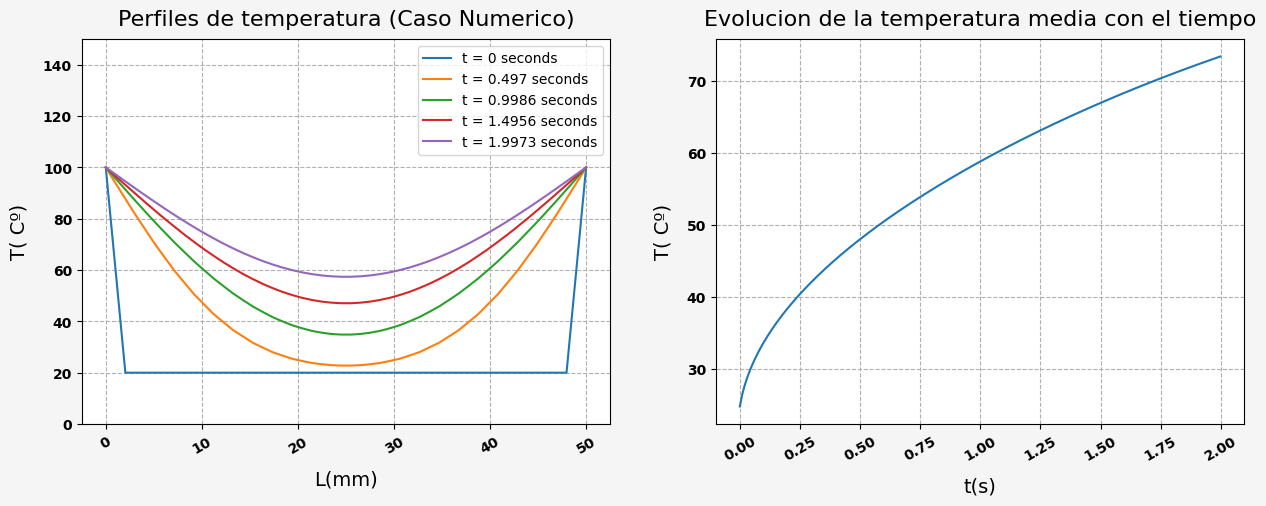

In [72]:
#https://github.com/Younes-Toumi/Youtube-Channel/blob/main/Simulation%20with%20Python/Heat%20Equation/heatEquation2D.py
###############  Parametros inciales ############## 
a = 110 #difusividad termica mm2/s
length = 50 #mm
t = 2 #seconds
nodes = 50
temp_ini=20# Temperatura inicial

############## Inicializar ############## 
#Diferenciales
dx = length / (nodes-1)
dt = 0.5 * dx**2 / a#condicion de estabilidad

u = np.zeros(nodes) + temp_ini # Temperatura inicial
x=np.arange(0,length+1,dx)
############### Condiciones de contorno ############## 
#Extremos temperatura de 100
u[0] = 100
u[-1] = 100

################  Simulacion############### 
counter = 0
time_mesh=[]
temperature_mesh=[]
start=time.time()
while counter < t :
    w = u.copy()
    d_ux = (w[:-2] - 2 * w[1:-1] + w[2:]) / dx**2
    u[1:-1] = w[1:-1] + dt * a *d_ux
    time_mesh.append(counter)
    temperature_mesh.append(u.copy())

    counter += dt
print('Tiempo ejecucion ',round(time.time()-start,4))
temperature_mesh=np.array(temperature_mesh)
temperature_mean=np.mean(temperature_mesh,axis=-1)
print('Temperatura media ',round((temperature_mean[-1]),4),' despues de',t,'s')
############################## PLOTS ##################################
plt.figure(facecolor='whitesmoke',figsize=(15,5))
plt.subplot(1,2,1)

time_points =np.linspace(0,len(time_mesh)-1,5,dtype=int)
for k in time_points:
    plt.plot(x, temperature_mesh[k], label=f"t = {round(time_mesh[k],4)} seconds")

plt.title("Perfiles de temperatura (Caso Numerico)", fontsize=16,pad=10)
plt.xlabel('L(mm)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
plt.ylim(0,150)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.legend()

plt.subplot(1,2,2)
plt.title('Evolucion de la temperatura media con el tiempo', fontsize=16,pad=10)
plt.plot(time_mesh,temperature_mean)
plt.xlabel('t(s)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.show()


Mismo resultado que 1D, pero 10 veces más rapido

# 4. Solucion Analitica para 1D
---
lo hago para 1d porque 2d me parece mas liada y si eso lo hago más adelante

$u(x,t)=u_e(x)+w(x,t)\quad$ Siendo w(x,t) la solución sin condiciones de contorno. Para condiciones de contorno u(0,t)=T1 y u(0,t)=T1: $u_e(x)=T1+\frac{T2-T1}{L}x$     
Entonces u(x,t) es:     
        
- $u(x,t)=u_e(x)+\sum_{n=1}^{n=\inf}B_n e^{k(\frac{n\pi}{L})^2t}\sin(\frac{n\pi}{L}x)$        

Para obtener Bn aplicamos la ultima condicion que es que partimos de una temperatura no nula al inicio u(x,0)=f(x)=T0.    
-   $u(x,t)=f(x)=u_e(x)+\sum_{n=1}^{n=\inf}B_n \sin(\frac{n\pi}{L}x)\rightarrow f(x)-u_e(x)=\sum_{n=1}^{n=\inf}B_n \sin(\frac{n\pi}{L}x)$ 

Aqui se aplica una transformada inversa de fourier para sacar los B_n:      
- $B_n=\frac{2}{L}\int_0^L(f(x)-u_e(x))\sin(\frac{n\pi}{L}x)dx=\frac{2}{L}\int_0^L(T_0-T_1-\frac{T2-T1}{L}x)\sin(\frac{n\pi}{L}x)dx=$       
$B_n=\frac{2}{L}(\int_0^L(T_0-T_1)\sin(\frac{n\pi}{L}x)dx-\int_0^L(\frac{T2-T1}{L}x)\sin(\frac{n\pi}{L}x)dx)$     

Para el primer término la solución es directa:
- $Término 1= \frac{L}{n\pi}(T_0-T_1)(\cos(\frac{n\pi}{L}0)-\cos(\frac{n\pi}{L}L))=\frac{L}{n\pi}(T_0-T_1)(1-(-1)^{n})$    

Para el segundo término hay que integrar por partes, pero bueno solo una vez sencillito.
- $\int dv u= u v-\int v du \rightarrow u=\frac{T2-T1}{L}x, du=1, dv=\sin(\frac{n\pi}{L}x), v= -\frac{L}{n\pi}\cos(\frac{n\pi}{L}x)$       
- $Término 2=-\frac{T2-T1}{L}x \frac{L}{n\pi}\cos(\frac{n\pi}{L}x)|^L_0+\int_0^L\cos(\frac{n\pi}{L}x)dx=\frac{T2-T1}{L}L \frac{L}{n\pi}\cos(\frac{n\pi}{L}L)$     
- $Término 2=-(T2-T1) \frac{L}{n\pi}(-1)^n$     

Se tiene finalmente:        
- $B_n=\frac{2}{L}(\frac{L}{n\pi}(T_0-T_1)(1-(-1)^{n})-(T2-T1) \frac{L}{n\pi}(-1)^n)=\frac{2}{n\pi}((T_0-T_1)(1-(-1)^{n})-(T2-T1)(-1)^n)$       

Para la ec. final:      
- $\boxed{u(x,t)=u_e(x)+\sum_{n=1}^{n=\inf}\frac{2}{n\pi}((T_0-T_1)(1-(-1)^{n})+(T2-T1)(-1)^n) e^{k(\frac{n\pi}{L})^2t}\sin(\frac{n\pi}{L}x)}$        


Tiempo de Simulacion  1.0979
Temperatura media  73.0642  despues de 2 s


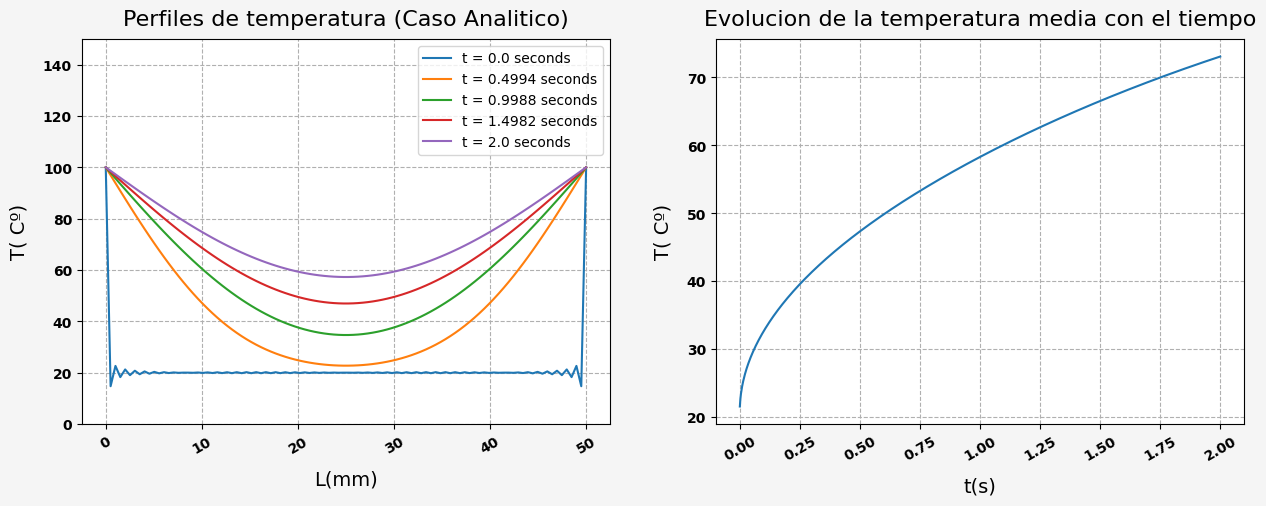

In [ ]:
################# Parametros inciales ################ 
a = 110 #difusividad termica mm2/s
length = 50 #mm
t = 2 #seconds
nodes = 100#nodos/steps en x
max_step = 846  #nodos steps en 
################ Inicializar #####################
#grids espaciales y temporales
t_node=np.linspace(0, t, max_step )
x = np.linspace(0, length, nodes )
u = np.ones((max_step,len(x)))*20
#################   Condiciones de contorno ################# 
T0=20
T1=100
T2=100
N=300#numero de coeficientes de la serie de fourier
########################### SIMULAR ##########################
def analytical_solution_at_t(x, t,T0,T1,T2,L,N):
    T = np.zeros_like(x)
    ue=T1+(T2-T1)*x/L
    dt0=(T0-T1)
    dt2= (T2-T1)
    for n in range( 1, N, 1 ): #  Suma de los terminos de Fourier (en teoria infinita, pero con 100 va de sobra)
        f_term_one=0 if n%2==0 else 2#1-(-1)^{n}--> si es par = 0, si es impar = 2
        f_term_two=1 if n%2==0 else -1 #(-1)^{n}--> si es par = 1, si es impar = -1
        #Vamos sumando los términos de fourirer
        T +=(2.0 / ( n * np.pi ))* ((T0-T1)*f_term_one + (T2-T1) *f_term_two) * np.exp( - a * ( n * np.pi / L ) ** 2 * t ) *  np.sin( n * np.pi * x / L )
    #print(ue+T)
    return ue + T
def analytical_solution(u,t_node,x,T0,T1,T2,L,N):
    for ind,t0 in enumerate(t_node):
        #print(t0)
        u[ind]= analytical_solution_at_t( x, t0, T0,T1,T2,L,N)
    return u
start=time.time()
u=analytical_solution(u,t_node,x,T0,T1,T2,length,N)
print('Tiempo de Simulacion ',round(time.time()-start,4))
mean_T=np.mean(u,axis=1)
print('Temperatura media ',round(mean_T[-1],4),' despues de',t,'s')
############################## PLOTS ##################################
plt.figure(facecolor='whitesmoke',figsize=(15,5))
plt.subplot(1,2,1)

time_points =np.linspace(0,max_step-1,5,dtype=int)
for k in time_points:
    plt.plot(x, u[k], label=f"t = {round(t_node[k],4)} seconds")

plt.title("Perfiles de temperatura (Caso Analitico)", fontsize=16,pad=10)
plt.xlabel('L(mm)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
plt.ylim(0,150)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.legend()

plt.subplot(1,2,2)
plt.title('Evolucion de la temperatura media con el tiempo', fontsize=16,pad=10)
plt.plot(t_node,mean_T)
plt.xlabel('t(s)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.show()

## 4.2 Optimizacion
Al igual que anteriormente, vamos a intentar quitar bucles y meter solo operaciones entre arrays. En la solución analitica se usan dos bucles, uno para calcular los N componentes de fourirer y otro para calcular en los instantes temporales t. Para ello hay que pasar de vectores t y x a arrays de distinto tamaño y el bucle n a vector y luego array. Al final quiero tener un array u(T,X,N) donde T,X y N son los tamaños de estos vectores para al final hacer la suma sobre n. Para ello, los arrays tienen que tener forma (T,1,1)(1,X,1)(1,1,N) para que las operaciones sean correctas.

Tiempo de Simulacion  0.0192
Temperatura media  70.0092  despues de 2 s


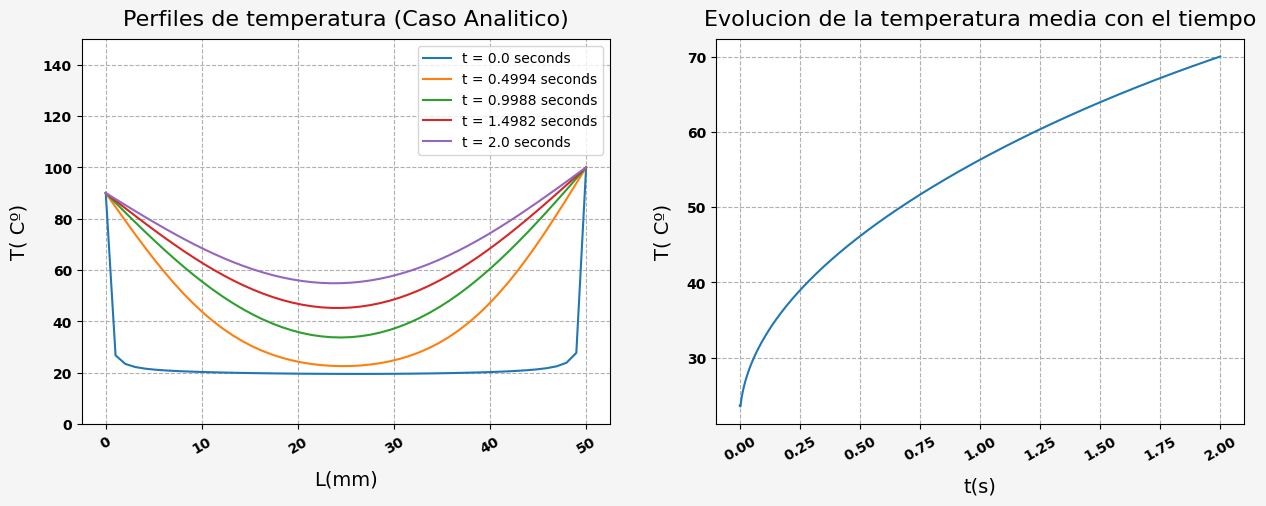

In [ ]:
################# Parametros inciales ################ 
a = 110 #difusividad termica mm2/s
length = 50 #mm
t = 2 #seconds
nodes = 50#nodos/steps en x
max_step = 846  #nodos steps en 
################ Inicializar #####################
#grids espaciales y temporales
N=100#numero de coeficientes de la serie de fourier
t_node=np.linspace(0, t, max_step )
x = np.linspace(0, length, nodes )
n=np.arange(1, N+1, 1 )
u = np.empty((max_step,len(x)))
#################   Condiciones de contorno ################# 
T0=20
T1=90
T2=100
########################### SIMULAR ##########################
def analytical_equation_pro(x, t,T0,T1,T2,L,n):
    #Creación de los arrays
    T = np.zeros_like((len(t),len(x),len(n)))
    t=t.reshape((len(t),1,1))
    x=x.reshape((1,len(x),1))
    n=n.reshape((1,1,len(n)))
    #defu¡ino ue (cambio la forma de x porque esta operacion la hare despues de sumar sobre n)
    ue=T1+(T2-T1)*x.reshape((1,x.shape[1]))/L
    #Antes eran numeros, hara tengo que hacerlos arrays en funcion de n
    f_term_one=np.where(n % 2 == 0, 0, 2)#1-(-1)^{n}--> si es par = 0, si es impar = 2
    f_term_two=np.where(n % 2 == 0, 1, -1) #(-1)^{n}--> si es par = 1, si es impar = -1
    T =(2.0 / ( n * np.pi ))* ((T0-T1)*f_term_one + (T2-T1) *f_term_two) * np.exp( - a * ( n * np.pi / L ) ** 2 * t ) *  np.sin( n * np.pi * x / L )
    #          (1,1,n)                    (1,1,n)                                (t,1,n)                                   (1,x,n)
    #ue mas la suma sobre todos los n componentes de fourier
    T=ue+np.sum(T,axis=-1)
    return T 
start=time.time()
u=analytical_equation_pro(x, t_node,T0,T1,T2,length,n)
print('Tiempo de Simulacion ',round(time.time()-start,4))
mean_T=np.mean(u,axis=1)
print('Temperatura media ',round(mean_T[-1],4),' despues de',t,'s')
############################## PLOTS ##################################
plt.figure(facecolor='whitesmoke',figsize=(15,5))
plt.subplot(1,2,1)

time_points =np.linspace(0,max_step-1,5,dtype=int)
for k in time_points:
    plt.plot(x, u[k], label=f"t = {round(t_node[k],4)} seconds")

plt.title("Perfiles de temperatura (Caso Analitico)", fontsize=16,pad=10)
plt.xlabel('L(mm)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
plt.ylim(0,150)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.legend()

plt.subplot(1,2,2)
plt.title('Evolucion de la temperatura media con el tiempo', fontsize=16,pad=10)
plt.plot(t_node,mean_T)
plt.xlabel('t(s)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.show()

Mismo resultado nuevamente, casi el doble de rápido

He mirado como afecta las n componentes de fourier a la precisión de los resultados, por ver la convergencia de estos. Por suerte, a partir de las 5 componentes los resultados son siempre los mismos.

In [44]:
N_list=[1,2,5,10,20,50,75,100,200,400]
finalT_list=[]
for N in N_list:
    start=time.time()
    n=np.arange(1, N+1, 1 )
    u=analytical_equation_pro(x, t_node,T0,T1,T2,length,n)
    mean_T=np.mean(u,axis=1)
    finalT=mean_T[-1]
    finalT_list.append(finalT)
    print(f"{N} : {round(finalT,12)} : {round(time.time()-start,4)}")

1 : 73.346036173353 : 0.0
2 : 73.346036173353 : 0.0026
5 : 73.343199816569 : 0.0007
10 : 73.343199816569 : 0.004
20 : 73.343199816569 : 0.0042
50 : 73.343199816569 : 0.0079
75 : 73.343199816569 : 0.01
100 : 73.343199816569 : 0.0123
200 : 73.343199816569 : 0.0211
400 : 73.343199816569 : 0.0477


Otra cosa que se me ha ocurrido es con la solucion analitica de 1D ver a que tiempo se alcanzza una temperatura determinada. Esto gracias a que en la ec analitica podemos calcular tiempos futuros sin necesidad de usar los resultados de anteriores tiempos como en las numericas.

In [11]:
T2=100
T0=20
T1=100
N=100
a=110
length=50
N=100#numero de coeficientes de la serie de fourier
x = np.linspace(0, length, 50 )
n=np.arange(1, N+1, 1 )
def time_to_achive_temperature(time_ini,time_end,tol,T,iter=0,max_iter=1000):
    u_ini=analytical_equation_pro(x, np.array([time_ini]),T0,T1,T2,length,n)
    u_end=analytical_equation_pro(x, np.array([time_end]),T0,T1,T2,length,n)

    mean_T_ini=np.mean(u_ini,axis=1)
    mean_T_end=np.mean(u_end,axis=1)
    if iter>=max_iter:
        print('Maximas iteraciones alcanzadas')
        return ''
    elif np.sign(mean_T_ini-T) == np.sign(mean_T_end-T):
        raise Exception(
         "Entre los tiempos marcados no se encuentra la temperatura deseada, escoge otro intervalo mayor")
    #tiempo medio
    time_mid = (time_ini + time_end)/2
    u_mid=analytical_equation_pro(x, np.array([time_mid]),T0,T1,T2,length,n)
    mean_T_mid=np.mean(u_mid,axis=1)
    print(iter,time_mid,mean_T_mid)
    if np.abs(mean_T_mid-T) < tol:
        # se ha encontrado la raiz
        return time_mid
    elif np.sign(mean_T_ini-T) == np.sign(mean_T_mid-T):
        # t_mid es mejor que t_ini---> llamada recursiva con t_ini=t_mid
        return time_to_achive_temperature(time_mid,time_end,tol,T,iter+1)
    elif np.sign(mean_T_end-T) == np.sign(mean_T_mid-T):
        # t_mid es mejor que t_end---> llamada recursiva con t_end=t_mid
        return time_to_achive_temperature(time_ini,time_mid,tol,T,iter+1)
TIME_M=time_to_achive_temperature(time_ini=0,time_end=20,tol=0.1,T=50,iter=0,max_iter=1000  )  


0 10.0 [99.17400196]
1 5.0 [92.75616981]
2 2.5 [78.54784059]
3 1.25 [63.03118894]
4 0.625 [50.95869456]
5 0.3125 [42.37305555]
6 0.46875 [47.03098847]
7 0.546875 [49.06524545]
8 0.5859375 [50.02777914]


# 5. Conclusiones
---
Numericas vs Analiticas
- Numericas:
    - Son más rapidas que las analiticas
    - Solo hace falta partir de la ec. diferencial (no hay que hacer desarrollos)
    - Puedes imponer las condiciones de contorno que quieras (no hay que hacer desarrollos)
- Analiticas
    - Te permite hacer predicciones a tiempos futuros sin tener que hacer el calculo sobr elos tiempos previos
    - Puedes tener todo el nivel de detalle que se desee
    - PROBLEMON: hay que resolver las ecuaciones para cada caso concreto (contra grande)
    - Contra: necesitas hacer el calculo extra de los componentes de fourier, que por suerte con unos pocos basta.      

Para generar mapas de calor usaré las soluciones númericas.

# 6. Otros
---
Hice de  rebote una solucion analitica extra buscando por internet, la solucion especifica está en esta [url](https://mathematica.stackexchange.com/questions/127334/analytic-solution-for-1d-heat-equation), la solucion general está aquí desarrollada. La solución es para el caso donde hay difusión D en un extremo, hay temperatura inicial T0 y en el otro extremo la temperatura está fija T2. En este caso la solución inicial cambia debido a la primera condición, en concreto, cambia la solución en X(x):      
Para condiciones de contorno du(0,t)/dx=0 y u(L,t)=0:   

- $X(x)=c1\sin(\lambda x)+c2\cos(\lambda x)\rightarrow X'(x)=c1\lambda\cos(\lambda x)+c2\lambda\sin(\lambda x)$  
- $X'(0)=c1\lambda=0 \rightarrow X(x)=c2\cos(\lambda x)$  
- $X(L)=c2\cos(\lambda L)=0 \rightarrow \lambda L=(n-\frac{1}{2})\pi$
- $X(x)=c2\cos((n-\frac{1}{2})\frac{\pi x}{L})$     

Por tanto, aplicando las condiciones de contorno fijas como en casos anteriores se tiene que ue=D(x-L)+T2. La solucion final será por tanto u(x,t)=ue+w(x,t):
- $u(x,t)=u_e(x)+\sum_{n=1}^{n=\inf}B_n e^{k(\frac{n\pi}{L})^2t}\cos((n-\frac{1}{2})\frac{\pi x}{L})$       

Al igual que antes, hay que calcular los coeficientes realizando una transformada de fourirer:  
- $B_n=\frac{2}{L}\int_0^L(f(x)-u_e(x))\cos((n-\frac{1}{2})\frac{\pi x}{L})dx=\frac{2}{L}\int_0^L(T_0-D(x-L)-T2)\cos((n-\frac{1}{2})\frac{\pi x}{L})dx=$       
$B_n=\frac{2}{L}(\int_0^L(T_0-T_2+DL)\cos((n-\frac{1}{2})\frac{\pi x}{L})dx-\int_0^L(Dx)\cos((n-\frac{1}{2})\frac{\pi x}{L}))$     

Para el primer término la solución es directa:
- $Término 1= \frac{L}{(n-1/2)\pi}(T_0-T_2+DL)(\sin((n-\frac{1}{2})\frac{\pi L}{L})-\sin((n-\frac{1}{2})\frac{\pi 0}{L}))=-\frac{2L}{(2n-1)\pi}(T_0-T_2+DL)(-1)^{n}$    

Para el segundo término hay que integrar por partes otra vez.
- $\int dv u= u v-\int v du \rightarrow u=x, du=1, dv=\cos((n-\frac{1}{2})\frac{\pi x}{L}), v= \frac{2L}{(2n-1)\pi}\sin((n-\frac{1}{2})\frac{\pi x}{L})$       
- $Término 2=-Ax \frac{2L}{(2n-1)\pi}\sin(\frac{(n-1/2)\pi}{L}x)|^L_0+\int_0^L\sin(\frac{(2n-1)\pi}{L}x)\frac{2L}{(2n-1)\pi}dx=
-Ax \frac{2L}{(2n-1)\pi}\sin(\frac{(n-1/2)\pi}{L}x)|^L_0+\cos(\frac{(2n-1)\pi}{L}x)\frac{4L^2}{(2n-1)^2\pi^2}dx|^L_0$       

Primer término, en cero es cero y en L el seno toma valores de 1,-1,1,-1,... En el segundo término en L es cero y en 0 en coseno es 1.
- $Término 2= A \frac{2L^2}{(2n-1)\pi}(-(-1))+A \frac{4L^2}{(2n-1)^2\pi^2}$

Se tiene finalmente:        
- $B_n=\frac{2}{L}(-\frac{2L}{(2n-1)\pi}(T_0-T_2+DL)(-1)^{n}-A \frac{2L^2}{(2n-1)\pi}(-(-1))+A \frac{4L^2}{(2n-1)^2\pi^2})=
-\frac{4}{(2n-1)\pi}(T_0-T_2)(-1)^{n}+A \frac{8L}{(2n-1)^2\pi^2}$       

Para la ec. final:      
- $\boxed{u(x,t)=u_e(x)+\sum_{n=1}^{n=\inf} (-\frac{4}{(2n-1)\pi}(T_0-T_2)(-1)^{n}+A \frac{8L}{(2n-1)^2\pi^2}) e^{k(\frac{n\pi}{L})^2t}\cos((n-\frac{1}{2})\frac{\pi x}{L})}$        



Tiempo de Simulacion  0.8551
Temperatura media  29.7939  despues de 2 s


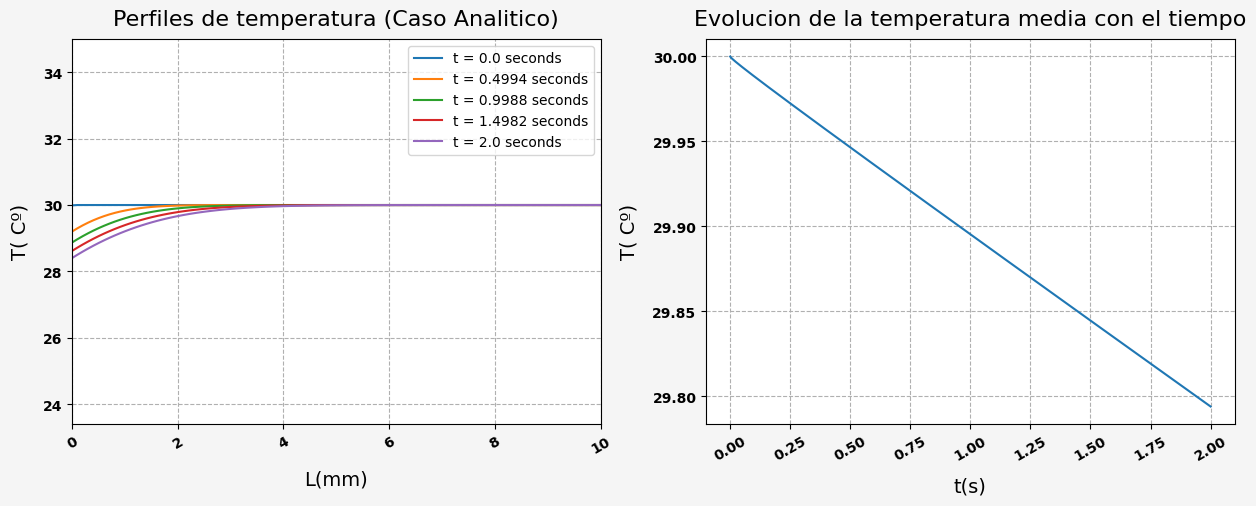

In [ ]:
################# Parametros inciales ################ 
a = 1 #difusividad termica mm2/s
length = 10 #mm
t = 2 #seconds
nodes = 100#nodos/steps en x
max_step = 846  #nodos steps en 
################ Inicializar #####################
#grids espaciales y temporales
t_node=np.linspace(0, t, max_step )
x = np.linspace(0, length, nodes )
#################   Condiciones de contorno ################# 
T0=30
D=1#DIFUSION EN EL EXTREMO IZQ
T2=30
N=200#numero de coeficientes de la serie de fourier
u = np.ones((max_step,len(x)))*T0
########################### SIMULAR ##########################
def analytical_solution_at_t(x, t,T0,D,T2,L,N):
    T = np.zeros_like(x)
    ue=D*(x-L) +T2
    for n in range( 1, N, 1 ): #  Suma de los terminos de Fourier (en teoria infinita, pero con 100 va de sobra)
        f_term_one=0 if n%2==0 else 2#1-(-1)^{n}--> si es par = 0, si es impar = 2
        f_term_two=1 if n%2==0 else -1 #(-1)^{n}--> si es par = 1, si es impar = -1
        #Vamos sumando los términos de fourirer
        #SOL. NUEVA CON DIFUSION EN UN LADO T1
        T+=((4*(T0-T2)/((2*n-1)*np.pi))*f_term_two +  (D*8*L/((2*n-1)**2*np.pi**2))  )*np.cos((n-1/2)*np.pi*x/L) * np.exp( - a * ( (n-1/2) * np.pi /L) ** 2 * t )
    return  ue + T
def analytical_solution(u,t_node,x,T0,D,T2,L,N):
    for ind,t0 in enumerate(t_node):
        #print(t0)
        u[ind]= analytical_solution_at_t( x, t0, T0,D,T2,L,N)
    return u
start=time.time()
u=analytical_solution(u,t_node,x,T0,D,T2,length,N)
print('Tiempo de Simulacion ',round(time.time()-start,4))
mean_T=np.mean(u,axis=1)
print('Temperatura media ',round(mean_T[-1],4),' despues de',t,'s')
############################## PLOTS ##################################
plt.figure(facecolor='whitesmoke',figsize=(15,5))
plt.subplot(1,2,1)

time_points =np.linspace(0,max_step-1,5,dtype=int)
for k in time_points:
    plt.plot(x, u[k], label=f"t = {round(t_node[k],4)} seconds")

plt.title("Perfiles de temperatura (Caso Analitico)", fontsize=16,pad=10)
plt.xlabel('L(mm)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
plt.ylim(np.min(u)-5,np.max(u)+5)
plt.xlim(0,length)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.legend()

plt.subplot(1,2,2)
plt.title('Evolucion de la temperatura media con el tiempo', fontsize=16,pad=10)
plt.plot(t_node,mean_T)
plt.xlabel('t(s)', fontsize=14, labelpad=10)
plt.ylabel('T( Cº)', fontsize=14, labelpad=10)
#numeros de los labels
plt.xticks(rotation=30,fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold')#negrita
plt.grid(True,linestyle='--',zorder=-1)
plt.show()
#https://mathematica.stackexchange.com/questions/127334/analytic-solution-for-1d-heat-equation